In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
#from nytcomments.nytcomments import get_dataset, get_comments, get_articles

In [30]:
#ARTICLE_API_KEY = 'ZetomKTzkJPE68W8gqOOuoVktht4GG68'

In [31]:
#articles_df, comments_df = get_dataset(ARTICLE_API_KEY, page_lower=0, page_upper=2, begin_date = 20220607)

In [33]:
comment1 = pd.read_csv('CommentsJan2017.csv')
comment2 = pd.read_csv('CommentsFeb2017.csv')
comment3 = pd.read_csv('CommentsMarch2017.csv')
comment4 = pd.read_csv('CommentsApril2017.csv')
comment5 = pd.read_csv('CommentsMay2017.csv')
comment6 = pd.read_csv('CommentsJan2018.csv')
comment7 = pd.read_csv('CommentsFeb2018.csv')
comment8 = pd.read_csv('CommentsMarch2018.csv')
comment9 = pd.read_csv('CommentsApril2018.csv')
comments_overall = pd.concat([comment1, comment2, comment3, comment4, comment5, comment6, comment7, comment8, comment9])
comments_overall.drop_duplicates(subset='commentID', inplace=True)

article1 = pd.read_csv('ArticlesJan2017.csv')
article2 = pd.read_csv('ArticlesFeb2017.csv')
article3 = pd.read_csv('ArticlesMarch2017.csv')
article4 = pd.read_csv('ArticlesApril2017.csv')
article5 = pd.read_csv('ArticlesMay2017.csv')
article6 = pd.read_csv('ArticlesJan2018.csv')
article7 = pd.read_csv('ArticlesFeb2018.csv')
article8 = pd.read_csv('ArticlesMarch2018.csv')
article9 = pd.read_csv('ArticlesApril2018.csv')
articles_overall = pd.concat([article1, article2, article3, article4, article5, article6, article7, article8, article9])
articles_overall.drop_duplicates(subset='articleID', inplace=True)

C:\Users\shahy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14,15,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\shahy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\shahy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\shahy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=resul

In [36]:
comments_overall.head(3)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1.483426e+09,1.0,...,approved,1.0,0.0,1483455908,N. Smith,64679318.0,New York City,NaN,NaN,News
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1.483417e+09,1.0,...,approved,1.0,0.0,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN,News
2,1483455655,58691a5795d0e039260788b9,1324.0,Democrats are comprised of malcontents who gen...,20969855.0,20969855.0,<br/>,comment,1.483431e+09,1.0,...,approved,1.0,0.0,1483455655,Frank Fryer,76788711.0,Florida,NaN,NaN,News


In [37]:
articles_overall.head(3)

,articleID,abstract,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,articleWordCount
0,58691a5795d0e039260788b9,NaN,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,The New York Times,News,https://www.nytimes.com/2017/01/01/us/politics...,1324
1,586967bf95d0e03926078915,NaN,By MARK LANDLER,article,Fractured World Tested the Hope of a Young Pre...,"['Obama, Barack', 'Afghanistan', 'United State...",1,Foreign,1,2017-01-01 20:34:00,Asia Pacific,A strategy that went from a “good war” to the ...,The New York Times,News,https://www.nytimes.com/2017/01/01/world/asia/...,2836
2,58698a1095d0e0392607894a,NaN,By CAITLIN LOVINGER,article,Little Troublemakers,"['Crossword Puzzles', 'Boxing Day', 'Holidays ...",1,Games,0,2017-01-01 23:00:24,Unknown,Chuck Deodene puts us in a bubbly mood.,The New York Times,News,https://www.nytimes.com/2017/01/01/crosswords/...,445


In [76]:
def wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS) 
    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    default_color = wordcloud.to_array()
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(default_color,  interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 
    
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [40]:
stopwords = set(STOPWORDS)

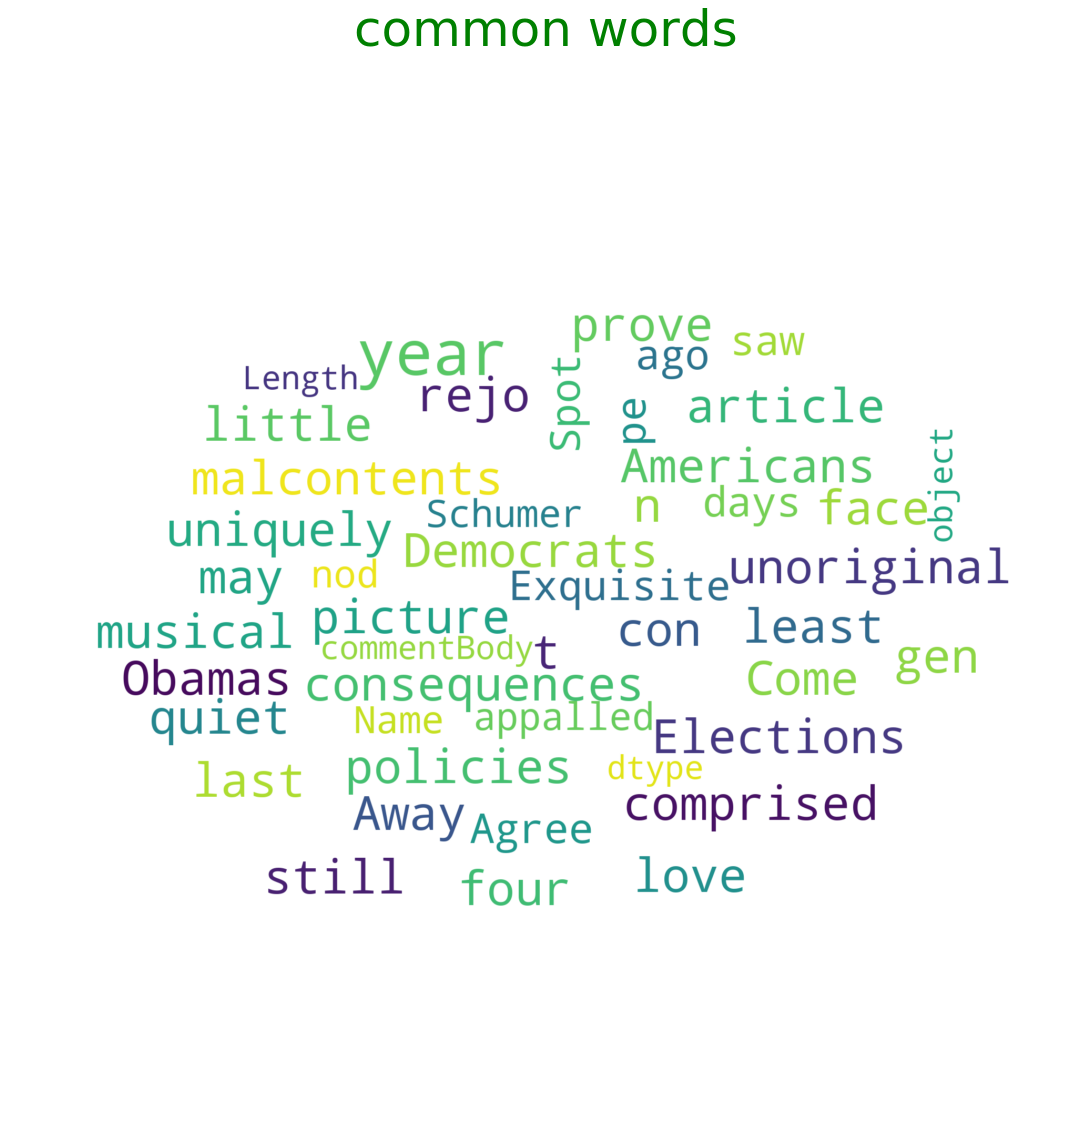

In [77]:
comments_text = str(comments_overall['commentBody'])
comments_mask = np.array(Image.open('comment.png'))
wordcloud(comments_text, comments_mask, max_words=200, max_font_size=120, 
               title = 'common words', title_size=50)

In [82]:
n = round(comments_overall.shape[0]*0.10)
top_recommended_comments = str(comments_overall.nlargest(n, columns='recommendations').commentBody)
#upvote_mask = np.array(Image.open('upvote.png'))
#plot_wordcloud(top_recommended_comments_text, upvote_mask, max_words=300000, max_font_size=300,
 #              title = 'Most common words in the top 10% most upvoted comments')

In [83]:
top_recommended_comments

'136526    Everyone should have walked out.  Spicer could...\n145592    As a patriot and veteran I am sickened by this...\n89531     As a lawyer of 35 years, this is one of the mo...\n136509    This is outrageous. The tendencies of an autho...\n233265    So, a sitting President can create, out of thi...\n                                ...                        \n92573     "So how does the G.O.P. stay politically compe...\n92725     Those of us who are of an age to remember duck...\n92863     David, your and Republican Party\'s criticism o...\n93585     London has long been a haven for tainted Russi...\n93663     Five kids, running the Trump Organization (wit...\nName: commentBody, Length: 211862, dtype: object'

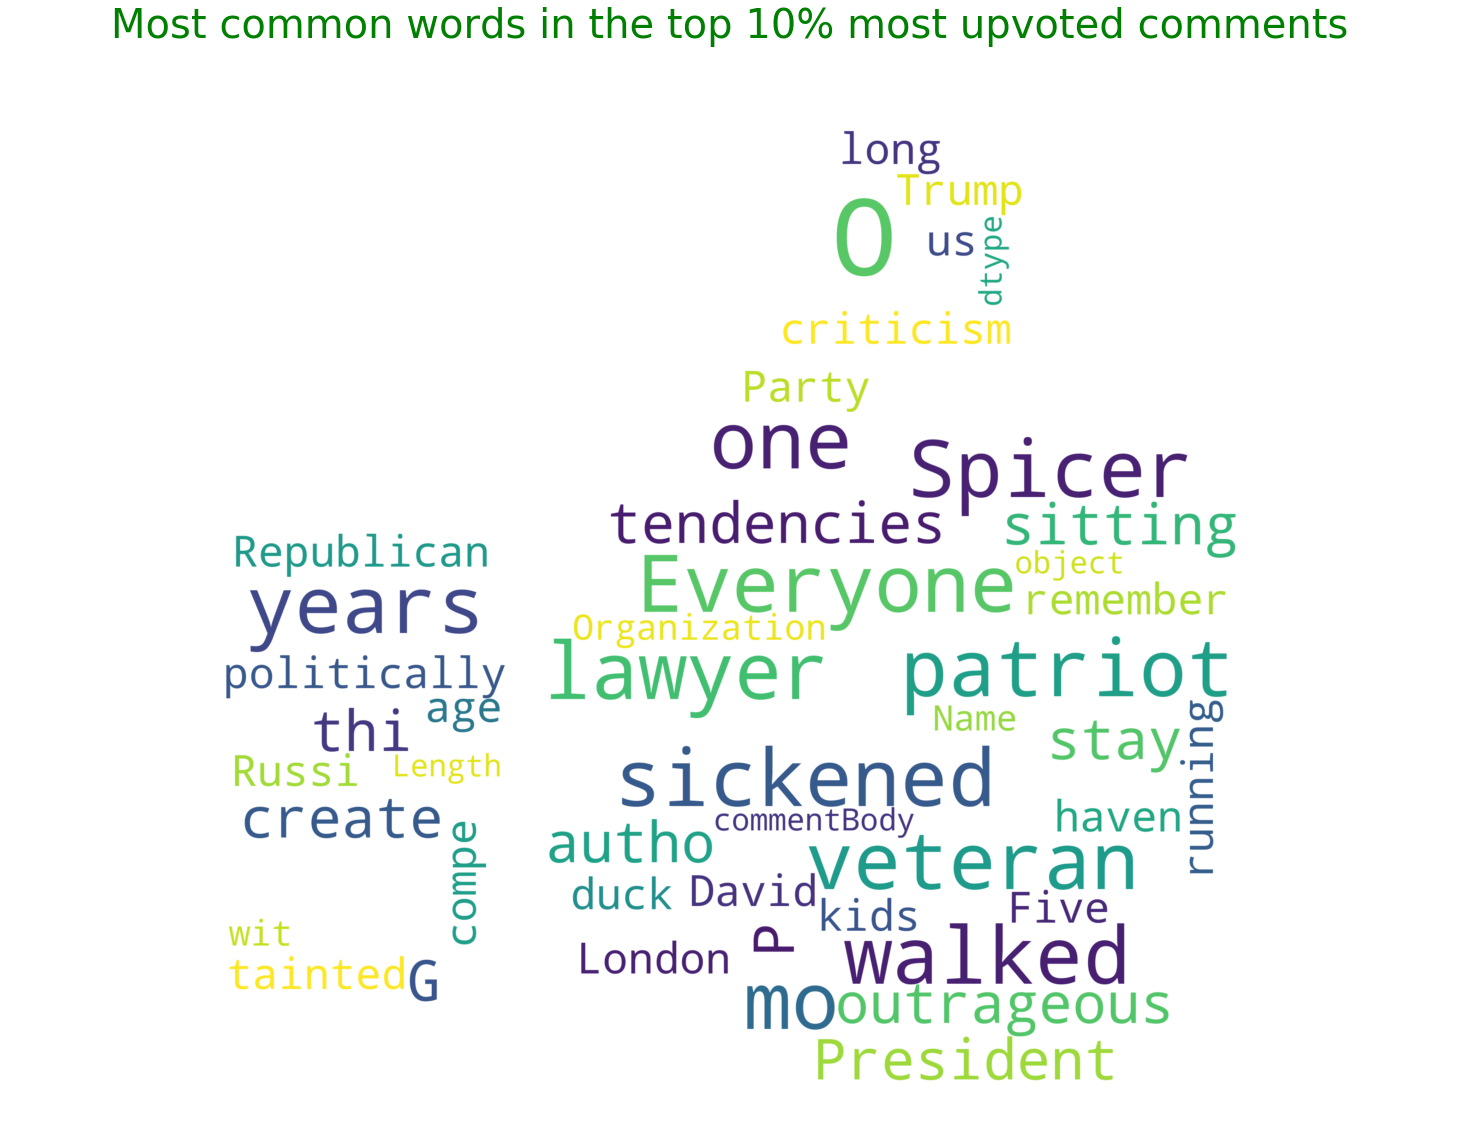

In [86]:
upvote_mask = np.array(Image.open('upvote.png'))
wordcloud(top_recommended_comments, upvote_mask, max_words=300000, max_font_size=300,
               title = 'Most common words in the top 10% most upvoted comments')

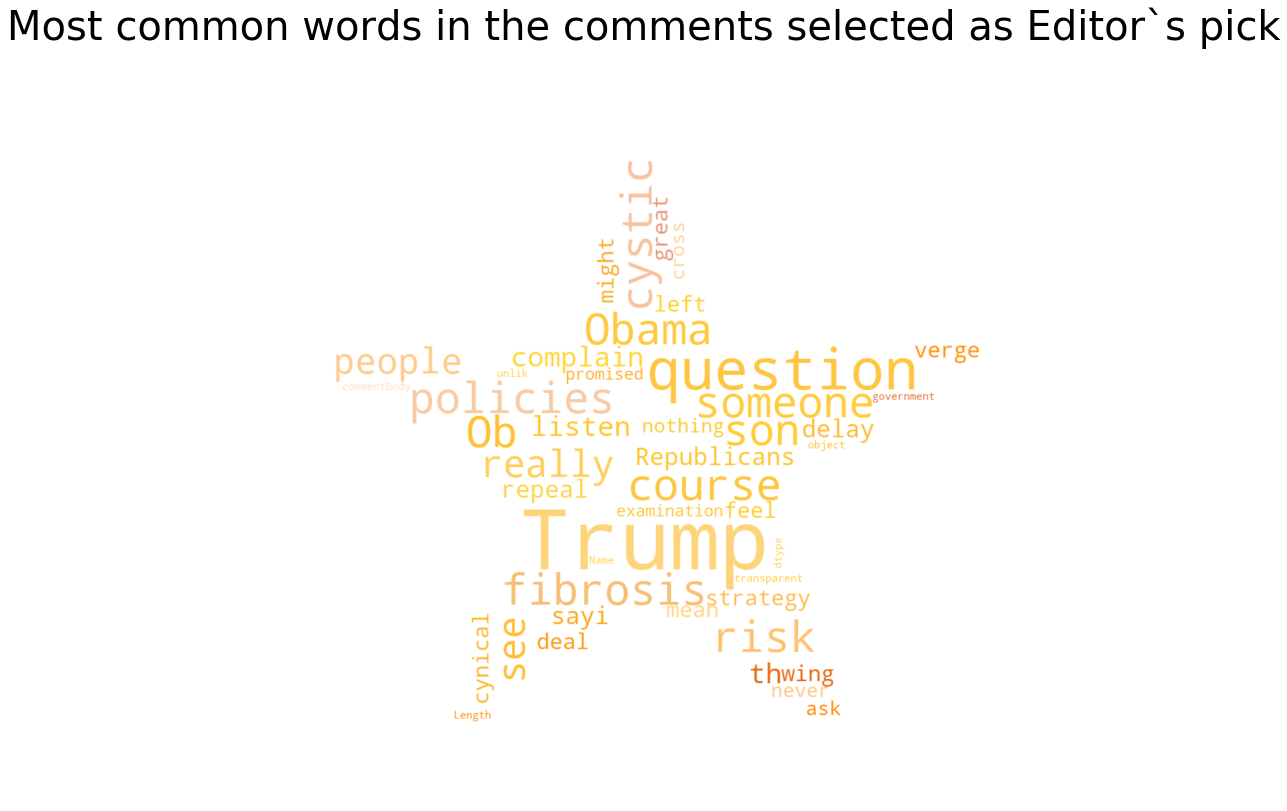

In [89]:
editorsPick_comments = str(comments_overall.loc[comments_overall.editorsSelection==1, 'commentBody'])
star_mask = np.array(Image.open('star.png'))
wordcloud(editorsPick_comments, star_mask, max_words=8000, max_font_size=120, figure_size=(16,14),
               title = 'Most common words in the comments selected as Editor`s pick', image_color=True)

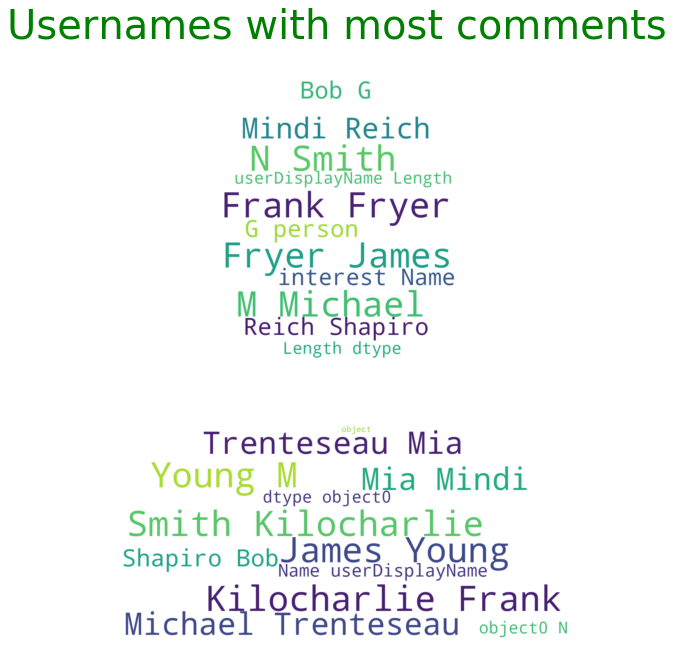

In [94]:
userDisplayNames = str(comments_overall['userDisplayName'])*8000
user_mask = np.array(Image.open('user.png'))
wordcloud(userDisplayNames, user_mask, max_words=1200, max_font_size=120, figure_size=(10,12), title = 'Usernames with most comments')

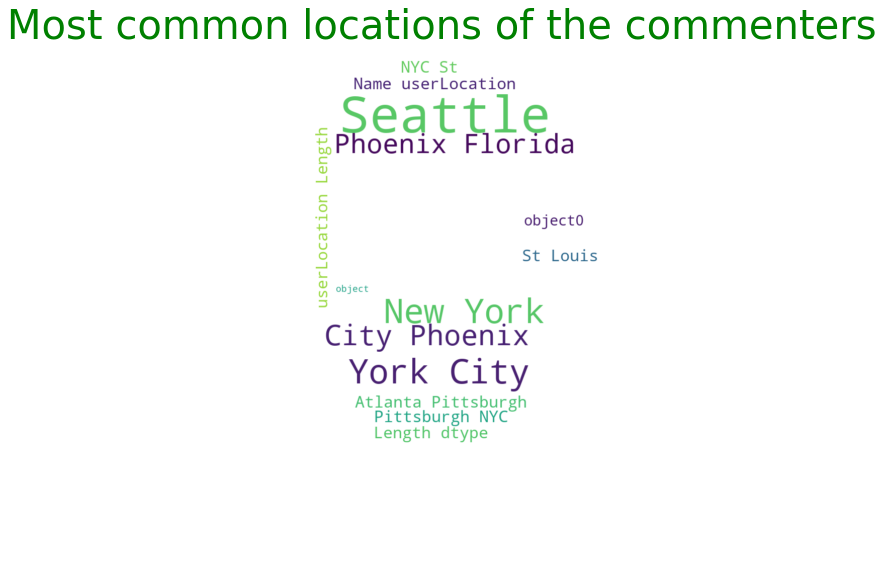

In [96]:
userLocations = str(comments_overall['userLocation'])*5
loc_mask = np.array(Image.open('loc.png'))
wordcloud(userLocations, loc_mask, max_words=800, max_font_size=100, figure_size=(11,16),
               title = 'Most common locations of the commenters')